In [1]:
import pandas as pd

df = pd.read_csv("Clean_Dataset.csv")

In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [9]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [12]:
df['duration'].min()

0.83

In [13]:
df['duration'].max()

49.83

In [14]:
df['duration'].median()

11.25

## Preprocessing

In [16]:
df.stops = pd.factorize(df.stops)[0]

In [19]:
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("flight", axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)


In [20]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [27]:
df = df.join(pd.get_dummies(df.airline, prefix="airline")).drop("airline", axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix="source")).drop("source_city", axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix="dest")).drop("destination_city", axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival")).drop("arrival_time", axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure")).drop("departure_time", axis=1)

In [28]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training Regression Model

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X,y = df.drop('price', axis=1), df.price

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [36]:
reg.score(X_test, y_test)

0.9853318134063684

In [38]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9853318134063684
MAE:  1070.1129883501328
MSE:  7549283.26916763
RMSE:  2747.595907182792


Text(0.5, 1.0, 'Prediction vs Actual Price')

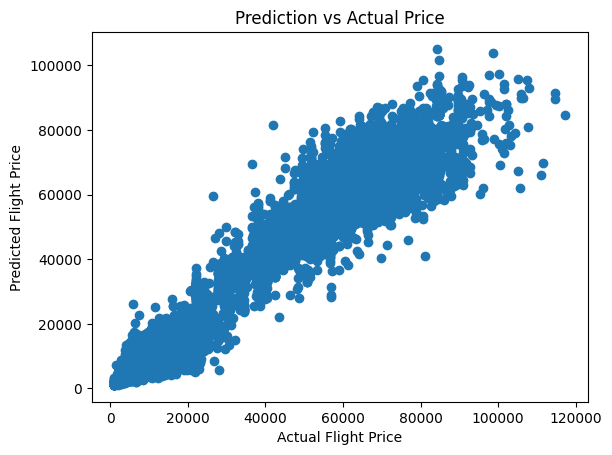

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction vs Actual Price")

In [40]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [41]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

[('class', 0.8802269544818748),
 ('duration', 0.057108382493524845),
 ('days_left', 0.01858577301667206),
 ('airline_Air_India', 0.00606230452119114),
 ('airline_Vistara', 0.0039723395546399165),
 ('source_Delhi', 0.003905453520831056),
 ('dest_Delhi', 0.0035275813399187643),
 ('source_Mumbai', 0.0022546222248619515),
 ('stops', 0.0018623212242026455),
 ('dest_Mumbai', 0.0018595935738027914),
 ('dest_Kolkata', 0.001794993471613398),
 ('source_Kolkata', 0.0017045595937694887),
 ('dest_Hyderabad', 0.0016079990441520474),
 ('arrival_Evening', 0.0014302194065833383),
 ('source_Hyderabad', 0.0012779199113821002),
 ('departure_Evening', 0.0011581025506348114),
 ('arrival_Night', 0.0011415401017718944),
 ('dest_Bangalore', 0.0011190670782563518),
 ('source_Bangalore', 0.0011007938488439453),
 ('arrival_Afternoon', 0.001041094288972588),
 ('source_Chennai', 0.0009239010414061558),
 ('departure_Morning', 0.0008543539235595913),
 ('dest_Chennai', 0.0008128011541752264),
 ('departure_Early_Mornin

In [42]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

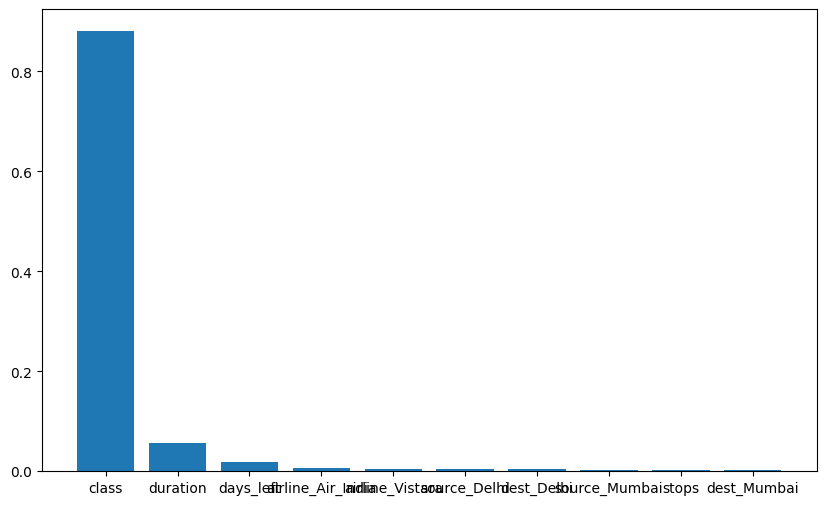

In [46]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None, 10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto','sqrt']
}

grid_search = GridSearchCV(reg,param_grid,cv=5)
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators' : randint(100,300),
    'max_depth' : [None, 10,20,30],
    'min_samples_split' : randint(2,11),
    'min_samples_leaf' : randint(1,5),
    'max_features' : [1.0, 'auto','sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg,param_distributions=param_grid,cv=3, n_iter=2,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)
random_search.fit(X_train,y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 1.3min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 1.3min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 1.3min


/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/base.py", 

In [50]:
best_regressor.score(X_test, y_test)

0.9863088802285433

In [51]:
y_pred = best_regressor.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9863088802285433
MAE:  1084.0873449583585
MSE:  7046415.776555718
RMSE:  2654.5085753403996


Text(0.5, 1.0, 'Prediction vs Actual Price')

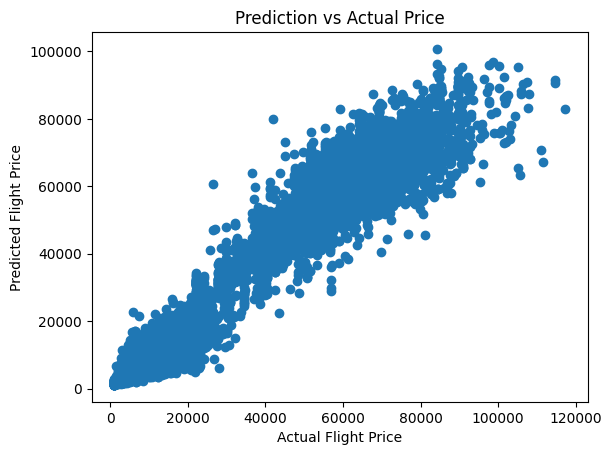

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction vs Actual Price")